In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from Dataset import Dataset
from torch.utils.data import DataLoader
torch.set_default_dtype(torch.float64)

In [2]:
x_data = np.float64(np.linspace(-15, 15, 6000))
y_data = np.float64(np.sin(x_data) / x_data)

In [3]:
dataset = Dataset(x_data, y_data)

trainset, testset = torch.utils.data.random_split(dataset, [0.9, 0.1], generator=torch.Generator().manual_seed(42))

trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=False)

In [4]:
class Perceptron(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

model = Perceptron(1, 100, 1)

In [19]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.000001)

Epoch: [1/1000], loss: 0.0004
Epoch: [2/1000], loss: 0.0002
Epoch: [3/1000], loss: 0.0003
Epoch: [4/1000], loss: 0.0006
Epoch: [5/1000], loss: 0.0002
Epoch: [6/1000], loss: 0.0003
Epoch: [7/1000], loss: 0.0003
Epoch: [8/1000], loss: 0.0002
Epoch: [9/1000], loss: 0.0004
Epoch: [10/1000], loss: 0.0004
Epoch: [11/1000], loss: 0.0005
Epoch: [12/1000], loss: 0.0004
Epoch: [13/1000], loss: 0.0003
Epoch: [14/1000], loss: 0.0006
Epoch: [15/1000], loss: 0.0005
Epoch: [16/1000], loss: 0.0003
Epoch: [17/1000], loss: 0.0002
Epoch: [18/1000], loss: 0.0003
Epoch: [19/1000], loss: 0.0003
Epoch: [20/1000], loss: 0.0005
Epoch: [21/1000], loss: 0.0005
Epoch: [22/1000], loss: 0.0003
Epoch: [23/1000], loss: 0.0003
Epoch: [24/1000], loss: 0.0006
Epoch: [25/1000], loss: 0.0002
Epoch: [26/1000], loss: 0.0005
Epoch: [27/1000], loss: 0.0004
Epoch: [28/1000], loss: 0.0005
Epoch: [29/1000], loss: 0.0005
Epoch: [30/1000], loss: 0.0003
Epoch: [31/1000], loss: 0.0004
Epoch: [32/1000], loss: 0.0005
Epoch: [33/1000],

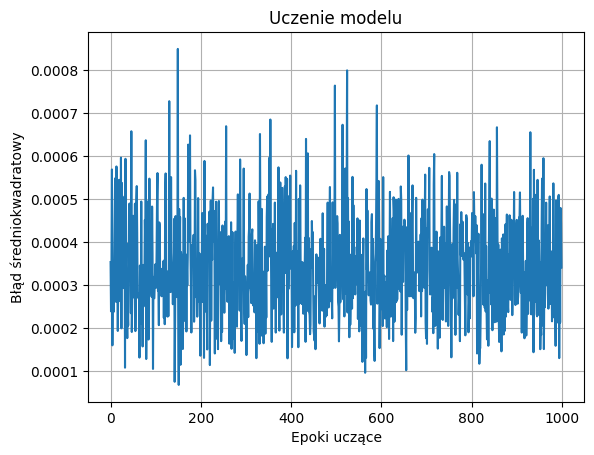

In [20]:
num_epochs = 1000
all_losses = []
model.train()

for epoch in range(num_epochs):
    for i, (x, y) in enumerate(trainloader):
        optimizer.zero_grad()
        x, y = x.reshape(-1, 1), y.reshape(-1, 1)
        preds = model(x)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
    all_losses.append(loss.item())
    print(f'Epoch: [{epoch+1}/{num_epochs}], loss: {loss.item():.4f}')

plt.plot(all_losses)
# plt.yscale('log')
plt.title('Uczenie modelu')
plt.xlabel('Epoki uczące')
plt.ylabel('Błąd średniokwadratowy')
plt.grid()
plt.show()

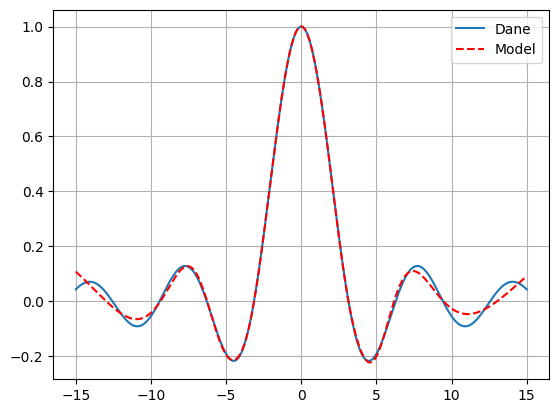

Train error: 0.0003318012836918541
Test error: 0.00032119976178483875


In [21]:
plt.plot(x_data, y_data)
plt.plot(x_data, model(torch.tensor(x_data).reshape(-1, 1)).detach().numpy(), 'r--')
plt.legend(['Dane', 'Model'], loc='upper right')
plt.grid()
plt.show()
print(f'Train error: {(model(trainset[:][0].clone().detach().reshape(-1, 1))-trainset[:][1].reshape(-1, 1)).reshape(-1).pow(2).mean()}')
print(f'Test error: {(model(testset[:][0].clone().detach().reshape(-1, 1))-testset[:][1].reshape(-1, 1)).reshape(-1).pow(2).mean()}')

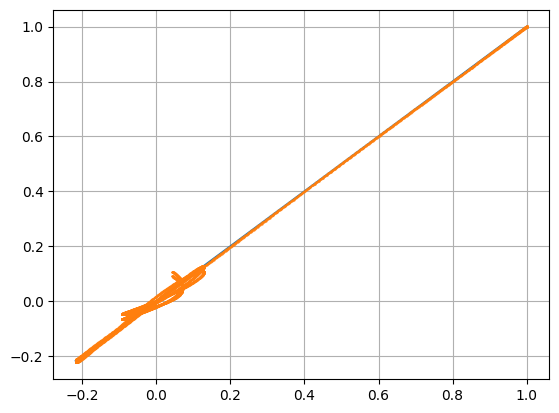

In [22]:
plt.plot([np.min(y_data), np.max(y_data)], [np.min(y_data), np.max(y_data)])
plt.plot(y_data, model(torch.tensor(x_data).reshape(-1, 1)).detach().numpy(), '.', markersize=1)
plt.grid()
plt.show()